In [19]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity


In [28]:
def cumulative_average(data):
    """
    Given a numpy array, compute the cumulative average.

    Inputs:
    - data: A numpy array of shape (N,)

    Returns:
    - cumulative_avg: A numpy array of shape (N,) containing the cumulative averages.
                      cumulative_avg[i] represents the average of data[:i+1].
    """
    N = len(data) #데이터 배열의 길이 저장
    cumulative_avg = np.zeros(N) #N-크기의 배열을 생성하여 초기화 (나중에 누적평균을 저장)
    cumulative_sum = np.cumsum(data) #data의 누적 합 계산
    num = np.arange(1,N+1)
    cumulative_avg = cumulative_sum / num #누적 평균 계산
    
    ###############
    return cumulative_avg
        

In [27]:
cumulative_average(np.array([1,3,5,7]))

array([1., 2., 3., 4.])

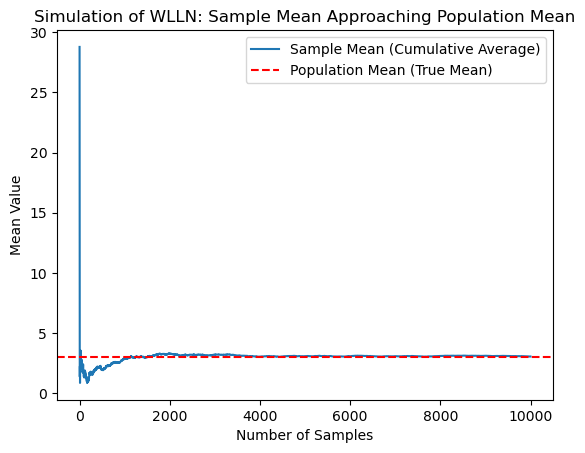

In [29]:
population_mean = 3
population_std = 10
sample_size = 10000

samples = np.random.normal(population_mean, population_std, size=sample_size)
cumulative_average_samples = cumulative_average(samples)

plt.plot(cumulative_average_samples, label="Sample Mean (Cumulative Average)")
plt.axhline(y=population_mean, color='r', linestyle='--', label="Population Mean (True Mean)")
plt.title("Simulation of WLLN: Sample Mean Approaching Population Mean")
plt.xlabel("Number of Samples")
plt.ylabel("Mean Value")
plt.legend()
plt.show()

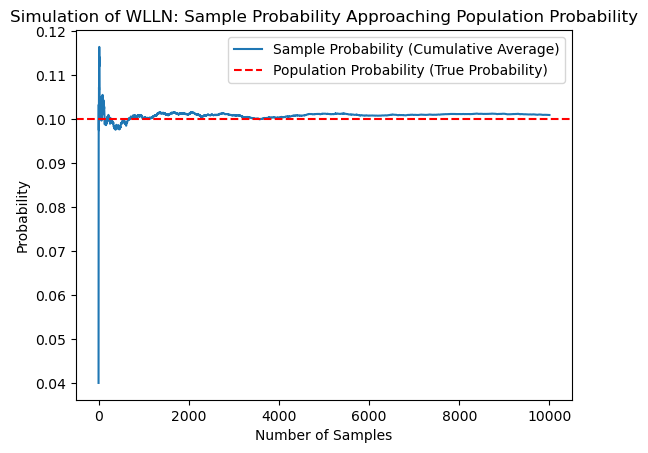

In [47]:
n = 50
population_prob = 0.1
sample_size = 10000

#### TO DO ####
samples = np.random.binomial(n, population_prob, sample_size) #힌트: np.random.binomial
cumulative_prob = cumulative_average(samples / n) #힌트: cumulative_average **표본비율이 모비율에 수렴
###############

plt.plot(cumulative_prob, label="Sample Probability (Cumulative Average)")
plt.axhline(y=population_prob, color='r', linestyle='--', label="Population Probability (True Probability)")
plt.title("Simulation of WLLN: Sample Probability Approaching Population Probability")
plt.xlabel("Number of Samples")
plt.ylabel("Probability")
plt.legend()
plt.show()


In [59]:
def normalize_sample_means(samples, population_mean, population_std):
    """
    Computes the normalized values for the sample means based on the Central Limit Theorem (CLT).

    Parameters:
    - samples: A numpy array of shape (n_iter, n),
               where each row represents the data obtained from one sampling iteration.
    - population_mean: The mean (μ) of the population.
    - population_std: The standard deviation (σ) of the population.

    Returns:
    - normalized_values: A numpy array of shape (n_iter,) containing the normalized values of the sample means,
                         calculated as √n(X̄n - μ)/σ.
    """
    n_iter, n = samples.shape # 샘플 배열의 크기 반환 (n_iter: 샘플링 반복 횟수, n: 각 샘플의 크기)
    normalized_values = np.zeros(n_iter) #정규화된 표본 평균을 저장할 배열 생성
    #### TO DO ####
    #표본 평균의 분포가 정규분포에 가까워지는 과정
    X_bar = samples.mean(axis=1) #각 행별로 표본평균을 계산
    normalized_values = np.sqrt(n)*((X_bar)-population_mean)/population_std # CLT 공식 적용
    
    
    ###############
    return normalized_values

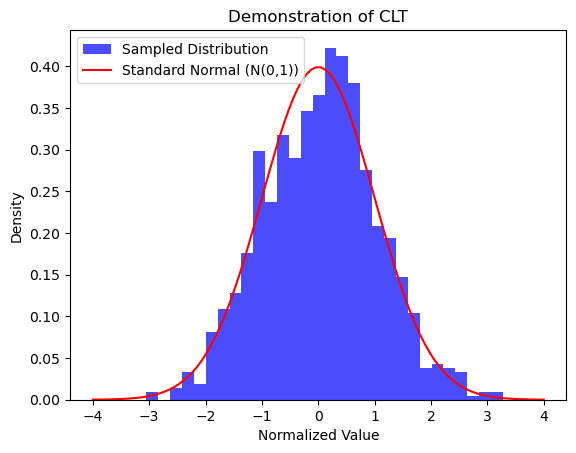

In [60]:
population_mean = 10
population_std = 5
n_iter = 1000
n = 10000

samples = np.random.normal(loc=population_mean, scale=population_std, size=(n_iter, n))
normalized_values = normalize_sample_means(samples, population_mean, population_std)

plt.hist(normalized_values, bins=30, density=True, alpha=0.7, color='blue', label="Sampled Distribution")
x = np.linspace(-4, 4, 100)
plt.plot(x, np.exp(-x**2 / 2) / np.sqrt(2 * np.pi), 'r-', label="Standard Normal (N(0,1))")
plt.title("Demonstration of CLT")
plt.xlabel("Normalized Value")
plt.ylabel("Density")
plt.legend()
plt.show()


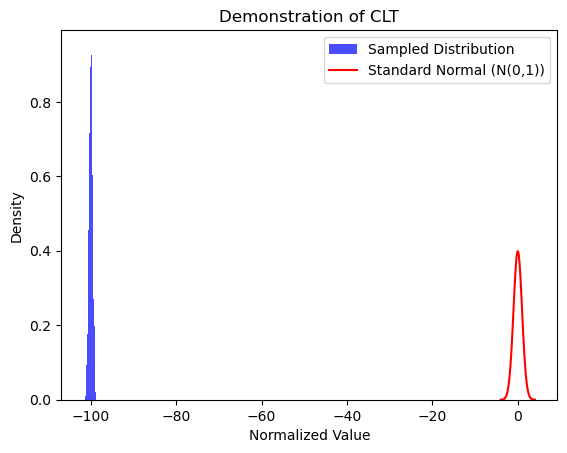

In [70]:
lambda_poisson = 5
n_iter = 1000
n = 10000

#### TO DO ####
samples = np.random.poisson(lambda_poisson, (n_iter,n)) # 포아송 분포 샘플 생성 (힌트: np.random.poisson)
normalized_values = normalize_sample_means(samples, population_mean, population_std) #정규화
###############

plt.hist(normalized_values, bins=30, density=True, alpha=0.7, color='blue', label="Sampled Distribution")
x = np.linspace(-4, 4, 100)
plt.plot(x, np.exp(-x**2 / 2) / np.sqrt(2 * np.pi), 'r-', label="Standard Normal (N(0,1))")
plt.title("Demonstration of CLT")
plt.xlabel("Normalized Value")
plt.ylabel("Density")
plt.legend()
plt.show()


In [ ]:
#4-2

In [81]:
# heights.csv 데이터 불러오기
data = pd.read_csv("heights.csv")
data

,heights,which
0,181.8,DSL
1,161.3,DSL
2,177.8,DSL
3,169.1,DSL
4,181.2,DSL
...,...,...
246,165.0,Else
247,176.7,Else
248,180.9,Else
249,174.7,Else


In [84]:
# DSL 데이터 형태
DSL.head()

,heights,which
0,181.8,DSL
1,161.3,DSL
2,177.8,DSL
3,169.1,DSL
4,181.2,DSL


In [85]:
# ESC 데이터 형태
ESC.head()

,heights,which
78,171.1,ESC
79,159.2,ESC
80,184.9,ESC
81,176.1,ESC
82,184.8,ESC


In [86]:
# Else 데이터 형태 
Else.head()

,heights,which
141,180.6,Else
142,169.3,Else
143,176.0,Else
144,180.3,Else
145,177.7,Else


In [87]:
#힌트: scipy.stats.f_oneway
import scipy

# 전처리
DSL = data[data['which'] == 'DSL']
ESC = data[data['which'] == 'ESC']
Else = data[data['which'] == 'Else']

# F분포 가설검정
f_stat, p_value = scipy.stats.f_oneway(DSL.heights, ESC.heights, Else.heights)

print("F-statistic:", f_stat)
print("p-value:", p_value)


F-statistic: 6.82185346949053
p-value: 0.0013059664602332191


In [ ]:
#5-A-1 Feature Scaling

In [88]:
def minmax_scaling_np(X):
    """
    Scales the input data X to the range [0, 1] using Min-Max Scaling.

    Parameters:
    - X: A numpy array of shape (N, F), where N is the number of samples and F is the number of features.
         Assume X_max > X_min for every feature

    Returns:
    - X_scaled: A numpy array of shape (N, F), with each feature scaled to the range [0, 1].
    """
    X_scaled = X.copy() # x.copy: 입력 배열 X의 복사본을 생성. 원본 데이터를 변경하지 않고 작업할 수 있게됨
    
    #### TO DO ####
    X_min = np.min(X, axis=0) #각 열의 최소값 계산
    X_max = np.max(X, axis=0) #각 열의 최대값 계산
    X_scaled = (X - X_min) / (X_max - X_min) # Min-Max Scaling 공식 적용
    
    ###############
    return X_scaled


In [89]:
X = np.array([[200, 3, 90, 300, 10],
              [500, 10, 50, 250, 15],
              [700, 4, 70, 400, 20],
              [100, 6, 80, 350, 15],
              [300, 7, 20, 200, 30]])

X_scaled_np = minmax_scaling_np(X)
scaler = MinMaxScaler()
X_scaled_sklearn = scaler.fit_transform(X)

print("Min-Max Scaling (numpy):\n", X_scaled_np)
print("\nMin-Max Scaling (sklearn):\n", X_scaled_sklearn)

assert np.allclose(X_scaled_np, X_scaled_sklearn), "Results do not match!"
print("\nResults match between numpy and sklearn implementations!")


Min-Max Scaling (numpy):
 [[0.16666667 0.         1.         0.5        0.        ]
 [0.66666667 1.         0.42857143 0.25       0.25      ]
 [1.         0.14285714 0.71428571 1.         0.5       ]
 [0.         0.42857143 0.85714286 0.75       0.25      ]
 [0.33333333 0.57142857 0.         0.         1.        ]]

Min-Max Scaling (sklearn):
 [[0.16666667 0.         1.         0.5        0.        ]
 [0.66666667 1.         0.42857143 0.25       0.25      ]
 [1.         0.14285714 0.71428571 1.         0.5       ]
 [0.         0.42857143 0.85714286 0.75       0.25      ]
 [0.33333333 0.57142857 0.         0.         1.        ]]

Results match between numpy and sklearn implementations!


In [ ]:
# 5-A-2 Cosine Similarity

In [111]:
def cosine_similarity_np(X, Y=None):
    """
    Computes the cosine similarity between samples in X and Y.

    Parameters:
    - X: A numpy array of shape (n_samples_X, n_features).
    - Y: A numpy array of shape (n_samples_Y, n_features), or None.
         If None, compute pairwise similarities within X.

    Returns:
    - similarities: A numpy array of shape (n_samples_X, n_samples_Y) containing cosine similarities.
                    similarities[i, j] is the cosine similarity between X[i] and Y[j] if Y is provided,
                    or between X[i] and X[j] if Y is None.
    """
    if Y is None:
        Y = X  # If Y is not provided, compare X with itself
    similarities = np.zeros((X.shape[0], Y.shape[0]))
    #### TO DO ####
    # Hint 1: np.linalg.norm
    # Hint 2: If broadcasting does not work properly, try reshape or keepdims=True
    
    # Compute the norms of X and Y
    X_norm = X / np.linalg.norm(X, axis=1, keepdims=True)
    Y_norm = Y / np.linalg.norm(Y, axis=1, keepdims=True)
    
    # 오류 방지: Avoid division by zero
    epsilon = 1e-10
    X_normalized = X / (X_norm + epsilon)
    Y_normalized = Y / (Y_norm + epsilon)
    
    # Compute cosine similarity
    similarities = np.dot(X_normalized, Y_normalized.T) #내적 (dot product) 계산 *Y의 transpose 사용*
    
    ###############
    return similarities

In [112]:
X = np.array([[1, 2, 3], [4, 2, 6]])
Y = np.array([[1, 0, 0], [0, 1, 0], [3, 5, 2], [2, 0, 1]])

cos_sim_np = cosine_similarity_np(X, Y)
cos_sim_sklearn = cosine_similarity(X, Y)

print("Cosine Similarity (numpy):\n", cos_sim_np)
print("\nCosine Similarity (sklearn):\n", cos_sim_sklearn)

assert np.allclose(cos_sim_np, cos_sim_sklearn), "Results do not match!"
print("\nResults match between numpy and sklearn implementations!")

Cosine Similarity (numpy):
 [[  3.74165738   3.74165739  69.19537554  16.73320052]
 [  7.48331477   7.48331477 138.39075108  33.46640105]]

Cosine Similarity (sklearn):
 [[0.26726124 0.53452248 0.82375447 0.5976143 ]
 [0.53452248 0.26726124 0.73704347 0.83666003]]


AssertionError: Results do not match!

In [ ]:
# 5-B Pandas (+matplotlib.pyplot)

In [127]:
# titanic.csv 데이터 불러오기
data = pd.read_csv("titanic.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [129]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [168]:
# 5-B-2
#### TO DO ####

# 1) 결측치 개수 확인
null_counts = data.isnull().sum()
print("Null counts per column:")
print(null_counts)

# 2) 기본 통계 요약 출력
print("\nSummary statistics:")
print(data.describe())

###############

Null counts per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

Summary statistics:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std   

In [177]:
# 5-B-2
#### TO DO ####
# 1) Cabin 열 제거
if 'Cabin' in data.columns: 
    df_new = data.drop(columns=["Cabin"])

# 2) Embarked 열에서 결측치가 있는 행 제거
df_new = data.dropna(subset=["Embarked"])
                   
# 3) 1,2의 과정을 새로운 dataframe(df_new)에 저장

###############
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [180]:
# 5-B-3
#### TO DO ####
# Surname 열 생성
df_new = data.copy()
df_new.loc[:, 'Surname'] = df_new['Name'].str.split(',').str[0]

# 첫 3개 행 출력
print(df_new.head(3))
###############

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Embarked    Surname  
0      0         A/5 21171   7.2500        S     Braund  
1      0          PC 17599  71.2833        C    Cumings  
2      0  STON/O2. 3101282   7.9250        S  Heikkinen  


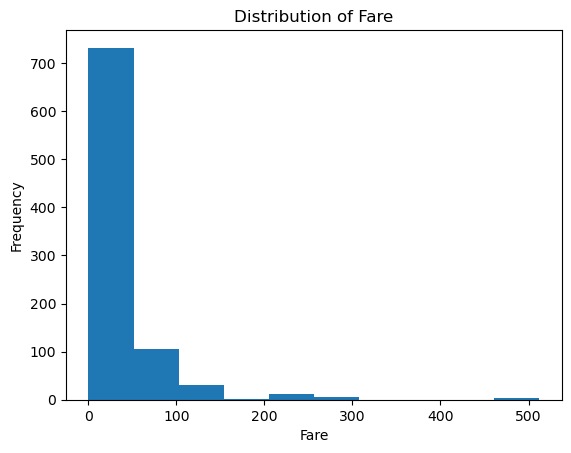

In [185]:
# 5-B-4
#### TO DO ####
# Fare 분포 시각화
plt.hist(df_new['Fare'])
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')

plt.show()
###############

Pclass 별 Fare 통계치:
         count       mean        std  min       25%      50%   75%       max
Pclass                                                                     
1       216.0  84.154687  78.380373  0.0  30.92395  60.2875  93.5  512.3292
2       184.0  20.662183  13.417399  0.0  13.00000  14.2500  26.0   73.5000
3       491.0  13.675550  11.778142  0.0   7.75000   8.0500  15.5   69.5500


<function matplotlib.pyplot.show(close=None, block=None)>

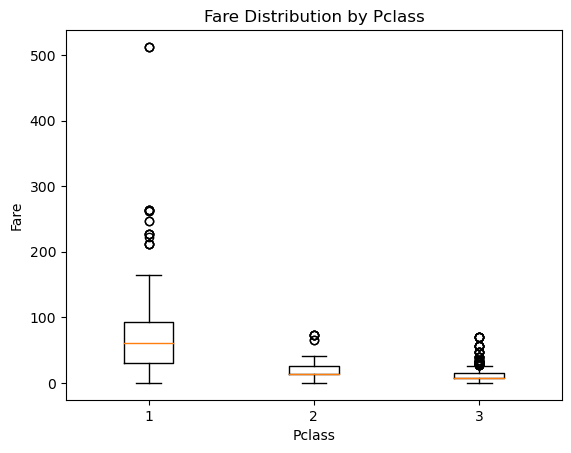

In [188]:
# 5-B-5
#### TO DO ####
# 1) Pclass 별 Fare 요약 통계치 확인
pclass_fare_stats = df_new.groupby('Pclass')['Fare'].describe()
print("Pclass 별 Fare 통계치:\n", pclass_fare_stats)

# 2) Pclass별 Fare를 boxplot으로 시각화
plt.boxplot([group['Fare'].values for name, group in df_new.groupby('Pclass')])
plt.title('Fare Distribution by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Fare')

plt.show
###############
#Q. Pclass와 Fare이 서로 관련이 있어 보이나요? 그 이유를 간략히 설명해 보세요.

#A. 서로 관련이 있어 보입니다. 그 이유는 등급이 낮아질 수록 Fare이 전반적으로 작아지기 때문입니다. 

In [189]:
# 5-B-6
#### TO DO ####
# Pclass 별 생존자 비율 계산
pclass_survival_rate = df_new.groupby('Pclass')['Survived'].mean() * 100
print("Pclass별 생존자 비율 (%) :\n", pclass_survival_rate)
###############

#Q. Pclass가 생존 여부와 관련이 있어 보이나요? 그 이유를 간략히 설명해 보세요.

#A.관련이 있어 보입니다. 그 이유는 등급이 높을수록 생존자 비율이 크기 때문입니다. 

Pclass별 생존자 비율 (%) :
 Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


In [190]:
# 5-B-7
#### TO DO ####
# 1) Sex 별 생존자 비율 계산
sex_survival_rate = df_new.groupby('Sex')['Survived'].mean() * 100
print("Sex별 생존자 비율 (%):\n", sex_survival_rate)

# 2) Sex와 Pclass의 조합에 따른 생존자 비율 계산
sex_pclass_survival_rate = df_new.groupby(['Sex', 'Pclass'])['Survived'].mean() * 100
print("Sex와 Pclass의 조합에 따른 생존자 비율 (%):\n", sex_pclass_survival_rate)
###############

#Q. 이 결과를 통해 도출할 수 있는 내용을 간략히 서술하세요.

#A. 여성 승객은 등급에 상관없이 높은 생존율을 보이고 남성 승객은 등급이 낮을수록 생존률이 매우 낮아지고, 전반적으로 생존율이 낮습니다. 

Sex별 생존자 비율 (%):
 Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64
Sex와 Pclass의 조합에 따른 생존자 비율 (%):
 Sex     Pclass
female  1         96.808511
        2         92.105263
        3         50.000000
male    1         36.885246
        2         15.740741
        3         13.544669
Name: Survived, dtype: float64
